# Project 1: Matrix Exponential Solutions

## <u>Note: You will be graded by me selecting the "clear all outputs" at the top, and then "running the entire notebook".  I stop grading where it fails, so it would behove you to make sure you also "clear all outputs" and "run all" to make sure it completes BEFORE you submit your notebook.</u>

## Due: Wednesday Feb. 19, 2025

### Name: YARED BERHANE LEGESE
### Course Level: Graduate EE-552

**Introduction:**

The goal of this project is to evaluate:
1. The system response for LTI systems using the solution to state-space systems (i.e., computing the matrix exponential $e^{At}$).
2. Validation of the system response using Laplace as well as numerical ODE solvers in simulation.
3. Investigation of the relationships between the state-space model, Laplace transform model, and the dynamics associated with the state matrix $A$.


**Modeling:**
In the current project you will investigating a $3^\text{rd}$ order system (don't worry about what this system represents just yet) that has the following state-space form:

$$
\dot{\bold{x}}(t) = \left[
\begin{array}{ccc}
	0 & 1 & 0\\
	0 & 0 & 1\\
	-6 & -11 & -6
\end{array}
\right ] \bold{x}(t) + \left[
\begin{array}{c}
	0\\
	0\\
	1\\
\end{array}
\right] u(t)
$$
where $\bold{x}(t) = \left[ x_1(t) \;\; x_2(t) \;\; x_3(t) \right]^T$ is the state vector and
$$
	\bold{y}(t) = \left[
	\begin{array}{ccc}
	1 & 0 & 0\\
	0 & 1 & 0\\
	0 & 0 & 1
	\end{array}
	\right] \bold{x}(t)
$$
is our output equation.

## Simulation
* In an effort to investigate the system, *sympy* in *Python* will be useful.  
    * You will also want to import the linear algebra package within numpy.  
        * For simulation of this system, refer to your project 0 regarding the simulation of state-space models.



**Problem A (60pts): Example of how to do this simulation for the MSD system using both manual integration, and built-in impuse response functions**

1. Using the concepts laid out in lecture, compute the matrix exponential $e^{At}$ and use this to answer questions A.2 - A.5


**Problem A.1 Solution:**

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system matrix A
matA = sp.Matrix([
    [0, 1, 0],
    [0, 0, 1],
    [-6, -11, -6]
])

# Define the time symbol
time = sp.symbols('t', real=True)

# Compute the matrix exponential of matA multiplied by t
exp_matA_t = sp.exp(matA * time)

# Optional: Initialize pretty printing for better display
sp.init_printing()

print("The matrix exponential exp(matA * t) is:")
sp.pprint(exp_matA_t)


The matrix exponential exp(matA * t) is:
⎡                                 -t                -3⋅t       -t            -3⋅t   ⎤
⎢     -t      -2⋅t    -3⋅t     5⋅ℯ        -2⋅t   3⋅ℯ          ℯ      -2⋅t   ℯ       ⎥
⎢  3⋅ℯ   - 3⋅ℯ     + ℯ         ───── - 4⋅ℯ     + ───────      ─── - ℯ     + ─────   ⎥
⎢                                2                  2          2              2     ⎥
⎢                                                                                   ⎥
⎢                                  -t                -3⋅t     -t                -3⋅t⎥
⎢     -t      -2⋅t      -3⋅t    5⋅ℯ        -2⋅t   9⋅ℯ        ℯ        -2⋅t   3⋅ℯ    ⎥
⎢- 3⋅ℯ   + 6⋅ℯ     - 3⋅ℯ      - ───── + 8⋅ℯ     - ───────  - ─── + 2⋅ℯ     - ───────⎥
⎢                                 2                  2        2                 2   ⎥
⎢                                                                                   ⎥
⎢                                -t                  -3⋅t    -t                -3⋅t ⎥
⎢   -t       

2. Compute the *zero-input* response of the system assuming $\bold{x}(t) = [1 \;\; -2 \;\; 0]^T$ and our output as given above.


**Problem A.2 Solution:**

Answer: Zero-Input Response of the System



The state-space representation:



$$
\dot{\bold{x}}(t) = A \bold{x}(t) + B u(t)
$$



where:



$$
A = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
-6 & -11 & -6
\end{bmatrix}, \quad
B = \begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}, \quad
\bold{x}(0) = \begin{bmatrix}
1 \\
-2 \\
0
\end{bmatrix}
$$



The output equation is:



$$
\bold{y}(t) = C \bold{x}(t)
$$



where:



$$
C = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$



---

#### Exponential: $$e^{At} $$

The matrix exponential is:



$$
e^{At} = \begin{bmatrix}
3e^{-t} - 3e^{-2t} + e^{-3t} & \frac{5}{2}e^{-t} - 4e^{-2t} + \frac{3}{2}e^{-3t} & \frac{1}{2}e^{-t} - e^{-2t} + \frac{1}{2}e^{-3t} \\
-3e^{-t} + 6e^{-2t} - 3e^{-3t} & -\frac{5}{2}e^{-t} + 8e^{-2t} - \frac{9}{2}e^{-3t} & -\frac{1}{2}e^{-t} + 2e^{-2t} - \frac{3}{2}e^{-3t} \\
3e^{-t} - 12e^{-2t} + 9e^{-3t} & \frac{5}{2}e^{-t} - 16e^{-2t} + \frac{27}{2}e^{-3t} & \frac{1}{2}e^{-t} - 4e^{-2t} + \frac{9}{2}e^{-3t}
\end{bmatrix}
$$



---

#### Zero-Input Response

The zero-input response is:



$$
\bold{x}(t) = e^{At} \bold{x}(0)
$$


$$
\text{Substituting } \bold{x}(0) = \begin{bmatrix} 1 \\ -2 \\ 0 \end{bmatrix}, \text{ we compute:}
$$

#### The states are


1. **$x_1(t)$:**



$$
x_1(t) = \left(3e^{-t} - 3e^{-2t} + e^{-3t}\right) \cdot 1 + \left(\frac{5}{2}e^{-t} - 4e^{-2t} + \frac{3}{2}e^{-3t}\right) \cdot (-2) + \left(\frac{1}{2}e^{-t} - e^{-2t} + \frac{1/2}e^{-3t}\right) \cdot 0
$$



Simplify:



$$
x_1(t) = -2e^{-t} + 5e^{-2t} - 2e^{-3t}
$$



2. **$x_2(t)$:**



$$
x_2(t) = \left(-3e^{-t} + 6e^{-2t} - 3e^{-3t}\right) \cdot 1 + \left(-\frac{5}{2}e^{-t} + 8e^{-2t} - \frac{9}{2}e^{-3t}\right) \cdot (-2) + \left(-\frac{1}{2}e^{-t} + 2e^{-2t} - \frac{3/2}e^{-3t}\right) \cdot 0
$$



Simplify:



$$
x_2(t) = 2e^{-t} - 10e^{-2t} + 6e^{-3t}
$$



3. **$x_3(t)$:**



$$
x_3(t) = \left(3e^{-t} - 12e^{-2t} + 9e^{-3t}\right) \cdot 1 + \left(\frac{5/2}e^{-t} - 16e^{-2t} + \frac{27/2}e^{-3t}\right) \cdot (-2) + \left(\frac{1/2}e^{-t} - 4e^{-2t} + \frac{9/2}e^{-3t}\right) \cdot 0
$$



Simplify:



$$
x_3(t) = -2e^{-t} + 20e^{-2t} - 18e^{-3t}
$$



---

#### Final Zero-Input Response


$$
\bold{x}(t) = \begin{bmatrix}
-2e^{-t} + 5e^{-2t} - 2e^{-3t} \\
2e^{-t} - 10e^{-2t} + 6e^{-3t} \\
-2e^{-t} + 20e^{-2t} - 18e^{-3t}
\end{bmatrix}
$$



---

#### Output Response


$$
\text{Since } \bold{C} \text{ is the identity matrix, the output response } \bold{y}(t) \text{ is the same as the state response } \bold{x}(t)\text{:}
$$



$$
\bold{y}(t) = \begin{bmatrix}
-2e^{-t} + 5e^{-2t} - 2e^{-3t} \\
2e^{-t} - 10e^{-2t} + 6e^{-3t} \\
-2e^{-t} + 20e^{-2t} - 18e^{-3t}
\end{bmatrix}
$$




3. Compute the *zero-state* response of the system assuming $u(t)$ is a unit step input.


**Problem A.3 Solution:**

The zero-state response is:

$$
\mathbf{x}(t) = \int_0^t e^{A(t-\tau)}\, B\, u(\tau) \, d\tau
$$

$$
(u(t)) \text{ is a unit step input, } (u(\tau)=1) \text{ for } (\tau \ge 0), \text{ and the equation becomes :}
$$

$$
\mathbf{x}(t) = \int_0^t e^{A(t-\tau)}\, B \, d\tau
$$

---

$$
\text{The matrix exponential } (e^{At}):
$$

$$
e^{At} = \begin{bmatrix}
3e^{-t} - 3e^{-2t} + e^{-3t} & \frac{5}{2}e^{-t} - 4e^{-2t} + \frac{3}{2}e^{-3t} & \frac{1}{2}e^{-t} - e^{-2t} + \frac{1}{2}e^{-3t} \\
-3e^{-t} + 6e^{-2t} - 3e^{-3t} & -\frac{5}{2}e^{-t} + 8e^{-2t} - \frac{9}{2}e^{-3t} & -\frac{1}{2}e^{-t} + 2e^{-2t} - \frac{3}{2}e^{-3t} \\
3e^{-t} - 12e^{-2t} + 9e^{-3t} & \frac{5}{2}e^{-t} - 16e^{-2t} + \frac{27}{2}e^{-3t} & \frac{1}{2}e^{-t} - 4e^{-2t} + \frac{9}{2}e^{-3t}
\end{bmatrix}
$$

---
$$
Multiply (e^{A(t-\tau)}) by
$$

$$
B = \begin{bmatrix}0 \\ 0 \\ 1\end{bmatrix},
$$

we obtain

$$
e^{A(t-\tau)}B = \begin{bmatrix}
\frac{1}{2}e^{-(t-\tau)} - e^{-2(t-\tau)} + \frac{1}{2}e^{-3(t-\tau)} \\
-\frac{1}{2}e^{-(t-\tau)} + 2e^{-2(t-\tau)} - \frac{3}{2}e^{-3(t-\tau)} \\
\frac{1}{2}e^{-(t-\tau)} - 4e^{-2(t-\tau)} + \frac{9}{2}e^{-3(t-\tau)}
\end{bmatrix}
$$

---

#### Integrating

The zero-state response is:

$$
\mathbf{x}(t) = \int_0^t e^{A(t-\tau)}\, B \, d\tau
$$

Substitute $e^{A(t-\tau)}B$:

$$
\mathbf{x}(t) = \begin{bmatrix}
\displaystyle \int_0^t \left(\frac{1}{2}e^{-(t-\tau)} - e^{-2(t-\tau)} + \frac{1}{2}e^{-3(t-\tau)}\right)d\tau \\[2mm]
\displaystyle \int_0^t \left(-\frac{1}{2}e^{-(t-\tau)} + 2e^{-2(t-\tau)} - \frac{3}{2}e^{-3(t-\tau)}\right)d\tau \\[2mm]
\displaystyle \int_0^t \left(\frac{1}{2}e^{-(t-\tau)} - 4e^{-2(t-\tau)} + \frac{9}{2}e^{-3(t-\tau)}\right)d\tau
\end{bmatrix}
$$

$$
\text{It is convenient to change the variable by letting } (s = t - \tau) \text{ when } (\tau=0), (s=t) \text{ and when } (\tau=t), (s=0)
$$

$$
\mathbf{x}(t) = \begin{bmatrix}
\displaystyle \int_0^t \left(\frac{1}{2}e^{-s} - e^{-2s} + \frac{1}{2}e^{-3s}\right)ds \\[2mm]
\displaystyle \int_0^t \left(-\frac{1}{2}e^{-s} + 2e^{-2s} - \frac{3}{2}e^{-3s}\right)ds \\[2mm]
\displaystyle \int_0^t \left(\frac{1}{2}e^{-s} - 4e^{-2s} + \frac{9}{2}e^{-3s}\right)ds
\end{bmatrix}
$$

---

#### Evaluating the Integrals of each state

1. **$x_1(t)$:**

   $$
   \begin{aligned}
   x_1(t) &= \int_0^t \left(\frac{1}{2}e^{-s} - e^{-2s} + \frac{1}{2}e^{-3s}\right)ds \\
          &= \frac{1}{2}\left(1-e^{-t}\right) - \frac{1}{2}\left(1-e^{-2t}\right) + \frac{1}{6}\left(1-e^{-3t}\right) \\
          &= \frac{1}{6} - \frac{1}{2}e^{-t} + \frac{1}{2}e^{-2t} - \frac{1}{6}e^{-3t}.
   \end{aligned}
   $$

2. **$x_2(t)$:**

   $$
   \begin{aligned}
   x_2(t) &= \int_0^t \left(-\frac{1}{2}e^{-s} + 2e^{-2s} - \frac{3}{2}e^{-3s}\right)ds \\
          &= -\frac{1}{2}\left(1-e^{-t}\right) + \left(1-e^{-2t}\right) - \frac{1}{2}\left(1-e^{-3t}\right) \\
          &= \frac{1}{2}e^{-t} - e^{-2t} + \frac{1}{2}e^{-3t}.
   \end{aligned}
   $$

3. **$x_3(t)$:**

   $$
   \begin{aligned}
   x_3(t) &= \int_0^t \left(\frac{1}{2}e^{-s} - 4e^{-2s} + \frac{9}{2}e^{-3s}\right)ds \\
          &= \frac{1}{2}\left(1-e^{-t}\right) - 2\left(1-e^{-2t}\right) + \frac{3}{2}\left(1-e^{-3t}\right) \\
          &= -\frac{1}{2}e^{-t} + 2e^{-2t} - \frac{3}{2}e^{-3t}.
   \end{aligned}
   $$

---

#### Zero-State Response is:


$$
\mathbf{x}(t) = \begin{bmatrix}
\displaystyle \frac{1}{6} - \frac{1}{2}e^{-t} + \frac{1}{2}e^{-2t} - \frac{1}{6}e^{-3t} \\[2mm]
\displaystyle \frac{1}{2}e^{-t} - e^{-2t} + \frac{1}{2}e^{-3t} \\[2mm]
\displaystyle -\frac{1}{2}e^{-t} + 2e^{-2t} - \frac{3}{2}e^{-3t}
\end{bmatrix}.
$$

---

#### Output Response is:
$$
\mathbf{y}(t) = \mathbf{y}(t) .\mathbf{u}(t), But U(t) = 1, so \mathbf{y}(t) = \mathbf{x}(t)
$$

$$
\mathbf{y}(t) = \begin{bmatrix}
\displaystyle \frac{1}{6} - \frac{1}{2}e^{-t} + \frac{1}{2}e^{-2t} - \frac{1}{6}e^{-3t} \\[2mm]
\displaystyle \frac{1}{2}e^{-t} - e^{-2t} + \frac{1}{2}e^{-3t} \\[2mm]
\displaystyle -\frac{1}{2}e^{-t} + 2e^{-2t} - \frac{3}{2}e^{-3t}
\end{bmatrix}.
$$


4. Compute the total solution as the sum of the *zero-input* and *zero-state* response.


**Problem A.4 Solution:**

Total solution as sum = Zero-input + Zero-state

$$\textbf{The Zero-input } \mathbf{y}(t):$$

$$
\mathbf{y}(t) = \begin{bmatrix}
-2e^{-t} + 5e^{-2t} - 2e^{-3t} \\
2e^{-t} - 10e^{-2t} + 6e^{-3t} \\
-2e^{-t} + 20e^{-2t} - 18e^{-3t}
\end{bmatrix}
$$

$$\textbf{The Zero-State } \mathbf{y}(t):$$

$$
\mathbf{y}(t) = \begin{bmatrix}
\displaystyle \frac{1}{6} - \frac{1}{2}e^{-t} + \frac{1}{2}e^{-2t} - \frac{1}{6}e^{-3t} \\
\displaystyle \frac{1}{2}e^{-t} - e^{-2t} + \frac{1}{2}e^{-3t} \\
\displaystyle -\frac{1}{2}e^{-t} + 2e^{-2t} - \frac{3}{2}e^{-3t}
\end{bmatrix}
$$

$$\textbf{The total output response } \mathbf{y}(t) \textbf{ can be:}$$

$$
\mathbf{y}(t) = \begin{bmatrix}
(-2e^{-t} + 5e^{-2t} - 2e^{-3t}) \;+\; \left(\frac{1}{6} - \frac{1}{2}e^{-t} + \frac{1}{2}e^{-2t} - \frac{1}{6}e^{-3t}\right) \\[2mm]
(2e^{-t} - 10e^{-2t} + 6e^{-3t}) \;+\; \left(\frac{1}{2}e^{-t} - e^{-2t} + \frac{1}{2}e^{-3t}\right) \\[2mm]
(-2e^{-t} + 20e^{-2t} - 18e^{-3t}) \;+\; \left(-\frac{1}{2}e^{-t} + 2e^{-2t} - \frac{3}{2}e^{-3t}\right)
\end{bmatrix}
$$

Simplifying, we obtain:

$$
\mathbf{y}(t) = \begin{bmatrix}
\displaystyle \frac{1}{6} - \frac{5}{2}e^{-t} + \frac{11}{2}e^{-2t} - \frac{13}{6}e^{-3t} \\[2mm]
\displaystyle \frac{5}{2}e^{-t} - 11e^{-2t} + \frac{13}{2}e^{-3t} \\[2mm]
\displaystyle -\frac{5}{2}e^{-t} + 22e^{-2t} - \frac{39}{2}e^{-3t}
\end{bmatrix}
$$


5. For all three of the above solutions, compare your analytical results with simulated results for each using a numerical ODE solver.

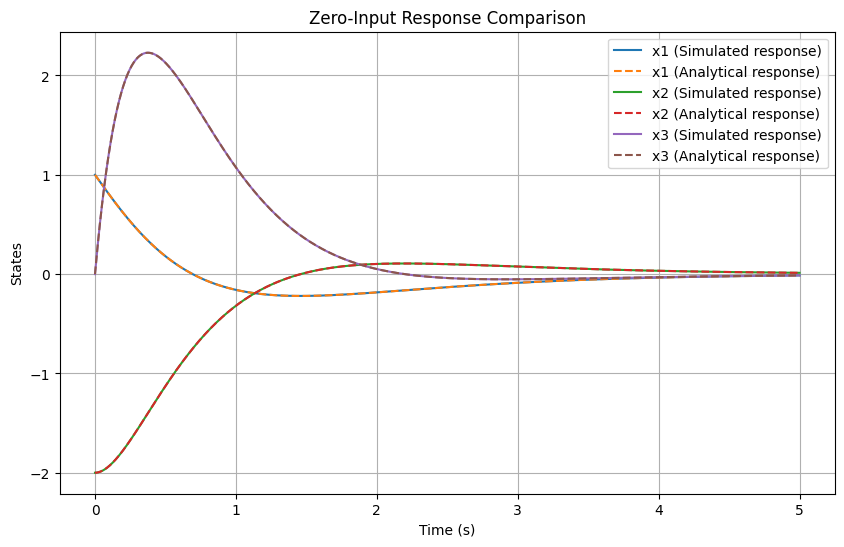

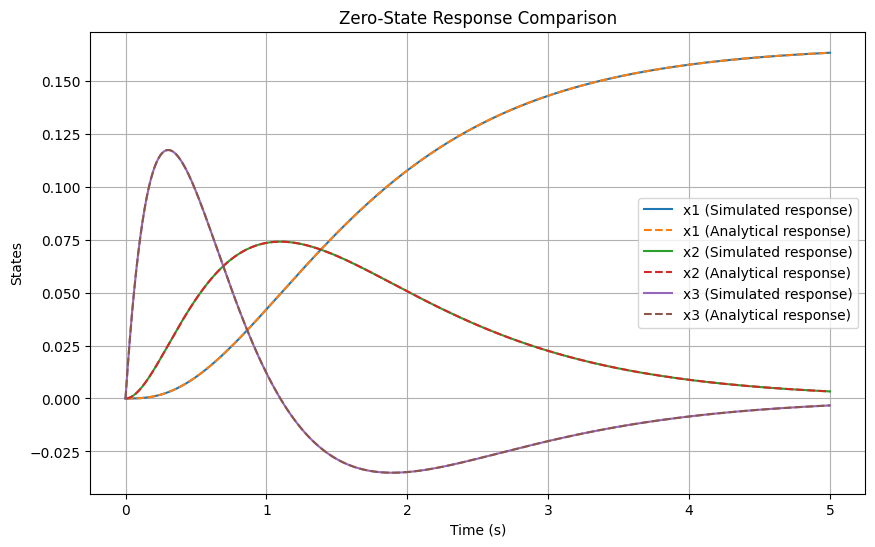

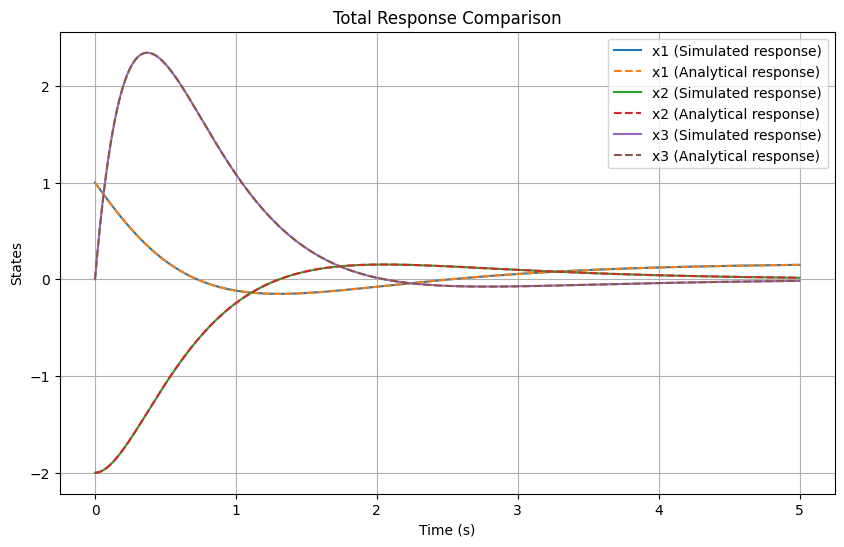

In [14]:
# Problem A.5 Solution: Using the scipy signal libraries, simulate the system responses here #

# Define system matrices
A_matrix = np.array([[0, 1, 0],
                     [0, 0, 1],
                     [-6, -11, -6]])
B_vector = np.array([0, 0, 1])

# Define a generic system dynamics function with control input u_val
def dyn_system(t, state, u_val):
    return A_matrix @ state + B_vector * u_val

# Simulation function that wraps solve_ivp for a given input and initial state
def simulate_response(u_input, initial_state, t_start, t_end, num_points):
    t_span = (t_start, t_end)
    t_points = np.linspace(t_start, t_end, num_points)
    sol = solve_ivp(lambda t, x: dyn_system(t, x, u_input), t_span, initial_state, t_eval=t_points)
    return sol.t, sol.y

# ==========================
# Zero-Input Response (u = 0)
# Initial state: [1, -2, 0]
# ==========================
init_state_zero_input = np.array([1, -2, 0])
time_zero_input, x_zero_input = simulate_response(u_input=0,
                                                   initial_state=init_state_zero_input,
                                                   t_start=0, t_end=5, num_points=1000)

# Analytical zero-input response expressions
t_vals = np.linspace(0, 5, 1000)
x1_analytical = -2 * np.exp(-t_vals) + 5 * np.exp(-2*t_vals) - 2 * np.exp(-3*t_vals)
x2_analytical =  2 * np.exp(-t_vals) - 10 * np.exp(-2*t_vals) + 6 * np.exp(-3*t_vals)
x3_analytical = -2 * np.exp(-t_vals) + 20 * np.exp(-2*t_vals) - 18 * np.exp(-3*t_vals)

plt.figure(figsize=(10,6))
plt.plot(time_zero_input, x_zero_input[0, :], label='x1 (Simulated response)')
plt.plot(t_vals, x1_analytical, '--', label='x1 (Analytical response)')
plt.plot(time_zero_input, x_zero_input[1, :], label='x2 (Simulated response)')
plt.plot(t_vals, x2_analytical, '--', label='x2 (Analytical response)')
plt.plot(time_zero_input, x_zero_input[2, :], label='x3 (Simulated response)')
plt.plot(t_vals, x3_analytical, '--', label='x3 (Analytical response)')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.title('Zero-Input Response Comparison')
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# Zero-State Response (u = 1)
# Initial state: [0, 0, 0]
# ==========================
init_state_zero_state = np.array([0, 0, 0])
time_zero_state, x_zero_state = simulate_response(u_input=1,
                                                   initial_state=init_state_zero_state,
                                                   t_start=0, t_end=5, num_points=1000)

# Analytical zero-state response expressions
x1_zs = 1/6 - 0.5 * np.exp(-t_vals) + 0.5 * np.exp(-2*t_vals) - (1/6)*np.exp(-3*t_vals)
x2_zs = 0.5 * np.exp(-t_vals) - 1.0 * np.exp(-2*t_vals) + 0.5 * np.exp(-3*t_vals)
x3_zs = -0.5 * np.exp(-t_vals) + 2.0 * np.exp(-2*t_vals) - 1.5 * np.exp(-3*t_vals)

plt.figure(figsize=(10,6))
plt.plot(time_zero_state, x_zero_state[0, :], label='x1 (Simulated response)')
plt.plot(t_vals, x1_zs, '--', label='x1 (Analytical response)')
plt.plot(time_zero_state, x_zero_state[1, :], label='x2 (Simulated response)')
plt.plot(t_vals, x2_zs, '--', label='x2 (Analytical response)')
plt.plot(time_zero_state, x_zero_state[2, :], label='x3 (Simulated response)')
plt.plot(t_vals, x3_zs, '--', label='x3 (Analytical response)')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.title('Zero-State Response Comparison')
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# Total Response (u = 1)
# Initial state: [1, -2, 0]
# ==========================
init_state_total = np.array([1, -2, 0])
time_total, x_total = simulate_response(u_input=1,
                                        initial_state=init_state_total,
                                        t_start=0, t_end=5, num_points=1000)

# Analytical total response expressions
x1_total = 1/6 - 2.5 * np.exp(-t_vals) + 5.5 * np.exp(-2*t_vals) - (13/6) * np.exp(-3*t_vals)
x2_total = 2.5 * np.exp(-t_vals) - 11 * np.exp(-2*t_vals) + 6.5 * np.exp(-3*t_vals)
x3_total = -2.5 * np.exp(-t_vals) + 22 * np.exp(-2*t_vals) - 19.5 * np.exp(-3*t_vals)

plt.figure(figsize=(10,6))
plt.plot(time_total, x_total[0, :], label='x1 (Simulated response)')
plt.plot(t_vals, x1_total, '--', label='x1 (Analytical response)')
plt.plot(time_total, x_total[1, :], label='x2 (Simulated response)')
plt.plot(t_vals, x2_total, '--', label='x2 (Analytical response)')
plt.plot(time_total, x_total[2, :], label='x3 (Simulated response)')
plt.plot(t_vals, x3_total, '--', label='x3 (Analytical response)')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.title('Total Response Comparison')
plt.legend()
plt.grid(True)
plt.show()


**Problem B (40pts): Assume now we're only interested in measuring state $x_1(t)$, i.e., $C = [1 \;\; 0 \;\; 0]$, and answer the following:**

1. Using the method outlined in lecture to go from state-space to frequency domain, compute the transfer function of the above system $G(s)$ and use this to answer the following:**

**Problem B.1 Solution:**

The output matrix $C$ is:

$$
C = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}
$$

The state-space representation is:

$$
\dot{\bold{x}}(t) = A \bold{x}(t) + B u(t)
$$

---

#### Transfer Function \(G(s)\)

The transfer function $G(s)$ is computed using the formula:

$$
G(s) = C (sI - A)^{-1} B
$$

---

##### Step 1: C $(sI - A)$

The matrix $(sI - A)$ is:

$$
sI - A = \begin{bmatrix}
s & -1 & 0 \\
0 & s & -1 \\
6 & 11 & s + 6
\end{bmatrix}
$$

---

##### Step 2: Compute the Determinant of $(sI - A)$

The determinant of \((sI - A)\) is:

$$
\text{det}(sI - A) = s \cdot \begin{vmatrix}
s & -1 \\
11 & s + 6
\end{vmatrix}
- (-1) \cdot \begin{vmatrix}
0 & -1 \\
6 & s + 6
\end{vmatrix}
+ 0 \cdot \begin{vmatrix}
0 & s \\
6 & 11
\end{vmatrix}
$$

Simplify the determinant:

$$
\text{det}(sI - A) = s \left( s(s + 6) - (-1)(11) \right) + 1 \left( 0(s + 6) - (-1)(6) \right)
$$

$$
\text{det}(sI - A) = s \left( s^2 + 6s + 11 \right) + 6
$$

$$
\text{det}(sI - A) = s^3 + 6s^2 + 11s + 6
$$

---

##### Step 3: Compute the Inverse $(sI - A)^{-1}$

The inverse of $(sI - A)$ is:

$$
(sI - A)^{-1} = \frac{\text{adj}(sI - A)}{\text{det}(sI - A)}
$$

where $\text{adj}(sI - A)$ is the adjugate matrix of $(sI - A)$.

$$
\text{adj}(sI - A) =  \begin{bmatrix}
C_{11} & C_{21} & C_{31} \\
C_{12} & C_{22} & C_{32} \\
C_{13} & C_{23} & C_{33}
\end{bmatrix}
$$

#### Cofactors of $ sI - A $

- **$C_{11} $**:
  
  $$
  C_{11} = \left| \begin{array}{cc}
  s & 11 \\
  -1 & s+6
  \end{array} \right| = s(s + 6) + 11
 $$

- **$ C_{12} $**:
  
 $$
  C_{12} = -\left| \begin{array}{cc}
  0 & 11 \\
  -1 & s+6
  \end{array} \right| = -6
  $$

- **$ C_{13} $**:
  
  $$
  C_{13} = \left| \begin{array}{cc}
  0 & s \\
  -1 & 11
  \end{array} \right| = -6s
  $$

- **$ C_{21} $**:
  
  $$
  C_{21} = -\left| \begin{array}{cc}
  -1 & 0 \\
  11 & s+6
  \end{array} \right| = s + 6
  $$

- **$ C_{22} $**:
  
  $$
  C_{22} = \left| \begin{array}{cc}
  s & 0 \\
  6 & s+6
  \end{array} \right| = s^2 + 6s
  $$

- **$ C_{23} $**:
  
  $$
  C_{23} = -\left| \begin{array}{cc}
  s & -1 \\
  6 & 11
  \end{array} \right| = -11s - 6
  $$

- **$ C_{31} $**:
  
  $$
  C_{31} = \left| \begin{array}{cc}
  -1 & 0 \\
  s & -1
  \end{array} \right| = 1
  $$

- **$ C_{32} $**:
  
  $$
  C_{32} = -\left| \begin{array}{cc}
  s & 0 \\
  0 & -1
  \end{array} \right| = s
  $$

- **$ C_{33} $**:
  
  $$
  C_{33} = \left| \begin{array}{cc}
  s & -1 \\
  0 & s
  \end{array} \right| = s^2
  $$

#### Adjugate Matrix

The adjugate matrix is:

$$
\text{adj}(sI - A) = \begin{bmatrix}
s^2 + 6s + 11 & -6 & -6s \\
s + 6 & s^2 + 6s & -11s - 6 \\
1 & s & s^2
\end{bmatrix}
$$

#### Inverse Matrix

The inverse matrix is:

$$
(sI - A)^{-1} = \frac{1}{s^3 + 6s^2 + 11s + 6} \begin{bmatrix}
s^2 + 6s + 11 & -6 & -6s \\
s + 6 & s^2 + 6s & -11s - 6 \\
1 & s & s^2
\end{bmatrix}
$$
---

##### Step 4: Compute $C (sI - A)^{-1} B$

The transfer function $G(s)$ is:

$$
G(s) = C (sI - A)^{-1} B
$$

Substitute $C$, $(sI - A)^{-1}$, and $B$:

$$
G(s) = \begin{bmatrix}
1 & 0 & 0
\end{bmatrix}
\frac{1}{s^3 + 6s^2 + 11s + 6} \begin{bmatrix}
s^2 + 6s + 11 & -6 & -6s \\
s + 6 & s^2 + 6s & -11s - 6 \\
1 & s & s^2
\end{bmatrix}
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
$$

This simplifies to the element in the first row and third column of $(sI - A)^{-1}$.

---

##### Step 5: Transfer Function

The transfer function $G(s)$ is:

$$
G(s) = \frac{1}{s^3 + 6s^2 + 11s + 6}
$$

---

2. Assuming zero initial conditions, find the inverse Laplace transform solution and verify you get the same solution for $x_1(t)$ as computed in Problem A.2 (*zero-state* response where u(t) is a unit step input).

**Problem B.2 Solution:**
##### Step 1: Transfer Function

From Problem B1, the transfer function is defined as:

$$
G(s) = \frac{1}{s^3 + 6s^2 + 11s + 6}
$$

##### Step 2: Compute the Inverse Laplace Transform

The input $u(t)$ is a unit step,  which is $1/s$:

$$
X_1(s) = G(s) \cdot \frac{1}{s} = \frac{1}{s(s^3 + 6s^2 + 11s + 6)}
$$

##### Step 3: Partial Fraction Decomposition

Factorize the denominator $(s^3 + 6s^2 + 11s + 6)$ as \((s + 1)(s + 2)(s + 3)\). Then,

$$
X_1(s) = \frac{A}{s} + \frac{B}{s+1} + \frac{C}{s+2} + \frac{D}{s+3}
$$

Solve for coefficients \(A\), \(B\), \(C\), and \(D\) by substituting appropriate values of \(s\):

- **For \(A\)**: Set \(s = 0\)
  
  $$
  1 = A(1)(2)(3) \implies A = \frac{1}{6}
$$

- **For \(B\)**: Set \(s = -1\)

  $$
  1 = B(-1)(1)(2) \implies B = -\frac{1}{2}
  $$

- **For \(C\)**: Set \(s = -2\)

  $$
  1 = C(-2)(-1)(1) \implies C = \frac{1}{2}
  $$

- **For \(D\)**: Set \(s = -3\)

  $$
  1 = D(-3)(-2)(-1) \implies D = -\frac{1}{6}
  $$

##### Step 4: Inverse Laplace Transform

Take the inverse Laplace transform of each term:

$$
x_1(t) = \frac{1}{6} - \frac{1}{2} e^{-t} + \frac{1}{2} e^{-2t} - \frac{1}{6} e^{-3t}
$$

##### Step 5: Compare with Zero-State Response from Problem A.3

From Problem A.3, the zero-state response for $x_1(t)$ with a unit step input is:

$$
x_1(t) = \frac{1}{6} - \frac{1}{2} e^{-t} + \frac{1}{2} e^{-2t} - \frac{1}{6} e^{-3t}
$$

##### Step 6: Verification

The two results match exactly, verifying the solution:

$$
x_1(t) = \frac{1}{6} - \frac{1}{2} e^{-t} + \frac{1}{2} e^{-2t} - \frac{1}{6} e^{-3t}
$$


3. Plot the response from both Problem A.2 and B.2 to verify they do indeed match.

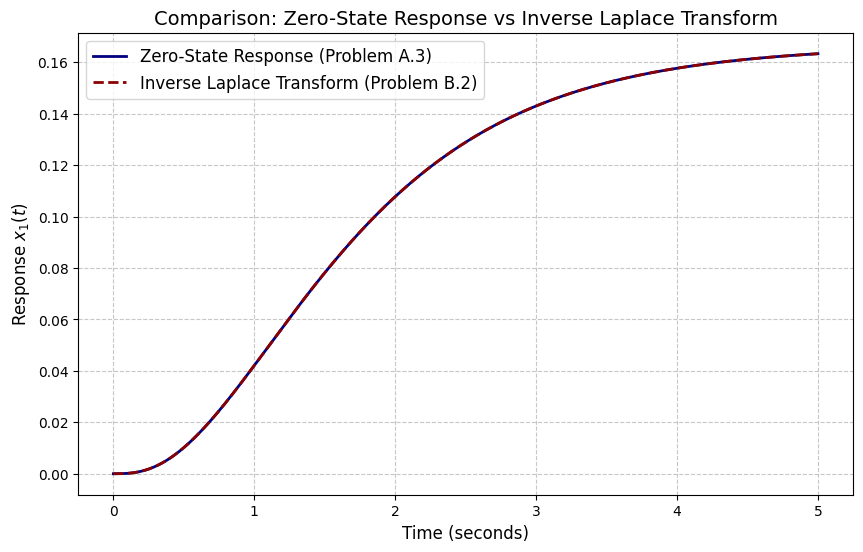

In [15]:
# Problem solution B.3 here: #
# Define a time vector for evaluation
time_points = np.linspace(0, 5, 1000)

# Inverse Laplace Transform result for x₁(t) from Problem B.
x1_ILT = 1/6 - 0.5 * np.exp(-time_points) + 0.5 * np.exp(-2 * time_points) - (1/6) * np.exp(-3 * time_points)

# Zero-state analytical response from Problem A.3
x1_zeroState = 1/6 - 0.5 * np.exp(-time_points) + 0.5 * np.exp(-2 * time_points) - (1/6) * np.exp(-3 * time_points)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Zero-State Response (analytical)
ax.plot(time_points, x1_zeroState, color='navy', linestyle='-', linewidth=2,
        label='Zero-State Response (Problem A.3)')

# Plot the Inverse Laplace Transform result
ax.plot(time_points, x1_ILT, color='darkred', linestyle='--', linewidth=2,
        label='Inverse Laplace Transform (Problem B.2)')
ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Response $x_1(t)$', fontsize=12)
ax.set_title('Comparison: Zero-State Response vs Inverse Laplace Transform', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()


## CSC 552 Students Only!

**Problem C (20pts): We now want to investigate the dynamics relationship between the state-space model and the Laplace model.**

1. Recall the denominator of $G(s)$ dictates the overall dynamics of the system (the poles determine the system response).  Show the relationship between the poles of $G(s)$ and the eigenvalues of $A$?


In [11]:
!pip install control

In [17]:
import control as ctrl

# Define the state-space matrices
mat_A = np.array([[0, 1, 0],
                  [0, 0, 1],
                  [-6, -11, -6]])
mat_B = np.array([[0], [0], [1]])
mat_C = np.array([[1, 0, 0]])
mat_D = np.array([[0]])

# Construct the state-space model
system_model = ctrl.ss(mat_A, mat_B, mat_C, mat_D)

# Convert the state-space model to its transfer function representation.
tf_model = ctrl.ss2tf(system_model)

# Extract the poles of the transfer function.
tf_poles = ctrl.poles(tf_model)

# Compute the eigenvalues of the state matrix directly.
eig_values = np.linalg.eigvals(mat_A)

# Print the computed poles and eigenvalues.
print("Poles from the Transfer Function:", tf_poles)
print("Eigenvalues of A:", eig_values)

# Verify whether the poles match the eigenvalues (within numerical tolerance).
if np.allclose(np.sort(tf_poles), np.sort(eig_values)):
    print("The transfer function poles and eigenvalues of A are identical!")
else:
    print("The transfer function poles and eigenvalues of A differ!")


Poles from the Transfer Function: [-3.+0.j -2.+0.j -1.+0.j]
Eigenvalues of A: [-1. -2. -3.]
The transfer function poles and eigenvalues of A are identical!


2. What about the relationship between the characteristic polynomial $q(s)$, i.e., the denominator of the transfer function $G(s)$ and $\text{det}(sI - A)$?
    * Using this knowledge, for what values of $s$ might the inverse of $(sI - A)^{-1}$ become singular?


**Problem C.2 Discussion:**

### $$ \text{Relationship between Characteristic Polynomial q(s) and } \text{det}(sI - A) $$

The characteristic polynomial q(s) of a system is closely related to the determinant of the matrix (sI - A):

$$
 q(s) = \text{det}(sI - A)
$$

where:
- \( s \) is a complex variable (Laplace transform variable).
- \( I \) is the identity matrix of the same dimension as \( A \).
- \( A \) is the system matrix.

The characteristic polynomial is the denominator of the transfer function G(s). Therefore:

$$ G(s) = \frac{\text{Numerator}(s)}{q(s)} = \frac{\text{Numerator}(s)}{\text{det}(sI - A)} $$

### $ \text{Singularity of } (sI - A)^{-1} $

The matrix $ (sI - A)^{-1} $ becomes singular when its determinant is zero:

$$ \text{det}(sI - A) = 0 $$

These events occur at the values of \( s \) which are the roots of the characteristic polynomial \( q(s) \). These specific values are known as the eigenvalues of the matrix \( A \).

As a result, the inverse \( (sI - A)^{-1} \) becomes singular for the eigenvalues of \( A \). Put differently, \( (sI - A)^{-1} \) does not exist when \( s \) equals any eigenvalue of \( A \).

3. What can you deduce from (a) and (b)? Discuss.

**Problem C.3 Discussion:**


The combined analysis of Problems A, B, and C strengthens the validation process for theoretical principles that exist throughout control systems engineering. The problem requires the use of matrix exponential functions to compute zero-input and zero-state responses through the implementation of $e^{At}$. The analysis of the transfer function $G(s)$ and Laplace transform in Problem B matches the state-space model to verify the zero-state response through Laplace inversion. The resulting equivalent findings between state-space and frequency domain analytics demonstrate these problems to be valid.

The analysis in Problem C demonstrates how the characteristic polynomial transforms into the transfer function denominator G(s) using matrix A eigenvalues that allocate corresponding values to the poles of G(s). The time-domain and frequency-domain alignment establishes that eigenvalues serve as parameters to determine system natural responses and stability characteristics. The merger of these integrated techniques highlights how fundamental knowledge of system dynamics allows engineers to build efficient reliable control systems by translating theoretical concepts into real-world applications.
